In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("C:/Users/BadBoy/Desktop/loan/train.csv")

test = pd.read_csv("C:/Users/BadBoy/Desktop/loan/test.csv")



train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
train.shape

(614, 13)

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#train = train[pd.notnull(train['Married'])]
train = train.dropna(subset = ['Married'])

In [7]:
train.shape

(611, 13)

In [8]:
train.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
test.shape

(367, 12)

In [10]:
train.describe(include= 'all')

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

train['Loan_Status'].value_counts().plot.bar()

Gen = pd.crosstab(train['Gender'], train.Loan_Status)
Gen.div(Gen.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Mar = pd.crosstab(train.Married, train.Loan_Status)
Mar.div(Mar.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Gra = pd.crosstab(train.Education, train.Loan_Status)
Gra.div(Gra.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Emp = pd.crosstab(train.Self_Employed, train.Loan_Status)
Emp.div(Emp.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Area = pd.crosstab(train.Property_Area, train.Loan_Status)
Area.div(Area.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Dep = pd.crosstab(train.Dependents, train.Loan_Status )
Dep.div(Dep.sum(1).astype(float),axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))

data = pd.concat([train , test])



C:\Users\BadBoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

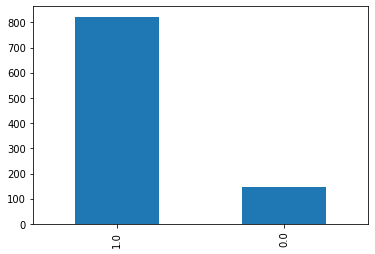

In [12]:

data['Gender'] = data['Gender'].fillna('missing')

#data = data[pd.notnull(data['Married'])]

data.Dependents.fillna(999, inplace= True)

data.Self_Employed.fillna('missing', inplace= True)

data.LoanAmount.fillna(data.LoanAmount.median(), inplace= True)

data['Loan_Amount_Term'].value_counts().plot.bar()

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace= True)

data['Credit_History'].value_counts().plot.bar()

data.Credit_History.fillna(-999, inplace= True)




In [13]:
data.shape

(978, 13)

In [14]:
y_train = train.Loan_Status
y_train = pd.DataFrame(y_train)

data.drop('Loan_ID',axis =1, inplace= True)

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['Total_Income by loan'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['Emi'] = data['LoanAmount'] / data['Loan_Amount_Term']

data['interest'] = data['Emi'] * data['LoanAmount']

data['Final_Amount'] = data['interest'] + data['LoanAmount']


y = pd.get_dummies(data.Gender, prefix = 'Gender')
y = y.drop('Gender_missing', axis=1)
data = data.drop('Gender', axis=1)
data = pd.concat([data, y], axis=1)

y = pd.get_dummies(data.Self_Employed, prefix = 'Self_Employment')
y = y.drop('Self_Employment_missing', axis=1)
data = data.drop('Self_Employed', axis=1)
data = pd.concat([data, y], axis=1)

#Ordinal Label encoding
ord_dict_grad = {'Graduate': 2, 'Not Graduate': 1}
data['Education'] = data['Education'].map(ord_dict_grad)

ord_dict_mar = {'Yes': 2, 'No': 1}
data['Married'] = data['Married'].map(ord_dict_mar)

ord_dict_prop = {'Urban': 2, 'Semiurban': 3, 'Rural': 1}
data['Property_Area'] = data['Property_Area'].map(ord_dict_prop)

data.Dependents.unique()
data.Dependents.replace(['3+'],3,inplace=True)

data.Dependents = data.Dependents.astype(int)

data.drop('Loan_Status',axis=1, inplace=True)
data.drop('Total_Income',axis=1, inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)



In [15]:
data.head(20)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,LoanAmount,Loan_Amount_Term,Married,Property_Area,Total_Income by loan,Emi,interest,Final_Amount,Gender_Female,Gender_Male,Self_Employment_No,Self_Employment_Yes
0,0.072210,0.000000,1.000,0.000000,1.0,0.169320,0.746835,0.0,0.5,0.055394,0.015017,0.007789,0.027341,0.0,1.0,1.0,0.0
1,0.056580,0.036192,1.000,0.001001,1.0,0.172214,0.746835,1.0,0.0,0.058435,0.015274,0.008039,0.027920,0.0,1.0,1.0,0.0
2,0.037037,0.000000,1.000,0.000000,1.0,0.082489,0.746835,1.0,0.5,0.019583,0.007316,0.002108,0.011705,0.0,1.0,0.0,1.0
3,0.031889,0.056592,1.000,0.000000,0.0,0.160637,0.746835,1.0,0.5,0.043980,0.014247,0.007061,0.025624,0.0,1.0,1.0,0.0
4,0.074074,0.000000,1.000,0.000000,1.0,0.191027,0.746835,0.0,0.5,0.057292,0.016943,0.009764,0.031781,0.0,1.0,1.0,0.0
5,0.066877,0.100703,1.000,0.002002,1.0,0.373372,0.746835,1.0,0.5,0.102705,0.033115,0.035114,0.077463,0.0,1.0,0.0,1.0
6,0.028802,0.036384,1.000,0.000000,0.0,0.124457,0.746835,1.0,0.5,0.030255,0.011038,0.004410,0.018838,0.0,1.0,1.0,0.0
7,0.037481,0.060096,0.999,0.003003,1.0,0.215630,0.746835,1.0,1.0,0.051510,0.019125,0.012270,0.037069,0.0,1.0,1.0,0.0
8,0.049457,0.036624,1.000,0.002002,1.0,0.230101,0.746835,1.0,0.5,0.051409,0.020408,0.013878,0.040308,0.0,1.0,1.0,0.0
9,0.158531,0.263230,1.000,0.001001,1.0,0.492041,0.746835,1.0,1.0,0.281141,0.043640,0.060022,0.115244,0.0,1.0,1.0,0.0


In [16]:
data_train = data[:611]
data_test = data[611:]

In [17]:
data_train.shape

(611, 17)

In [18]:
data_train.tail(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,LoanAmount,Loan_Amount_Term,Married,Property_Area,Total_Income by loan,Emi,interest,Final_Amount,Gender_Female,Gender_Male,Self_Employment_No,Self_Employment_Yes
611,0.099654,0.00576,1.000,0.001001,1.0,0.353111,0.746835,1.0,0.5,0.086352,0.031318,0.031524,0.071647,0.0,1.0,1.0,0.0
612,0.093617,0.00000,1.000,0.002002,1.0,0.257598,0.746835,1.0,0.5,0.077189,0.022847,0.017204,0.046721,0.0,1.0,1.0,0.0
613,0.056580,0.00000,0.999,0.000000,1.0,0.179450,0.746835,0.0,1.0,0.039481,0.015916,0.008683,0.029386,1.0,0.0,0.0,1.0


In [19]:
data_test.shape

(367, 17)

In [20]:
data_trains = data_train.to_numpy()
y_trains = y_train.to_numpy()

data_test.shape

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
#specifying the initial learners
model1 = RandomForestClassifier(n_estimators = 395)
model2 = LogisticRegression()
model3 = xgb.XGBClassifier(gamma=1, n_estimators = 395 , max_depth = 12)

#Stratified KFold
#One Way
from sklearn.model_selection import StratifiedKFold
flag = 1
skf = StratifiedKFold(n_splits=7)
for train_index, test_index in skf.split(data_trains,y_trains):
  xtraining, xvalid = data_trains[train_index], data_trains[test_index]
  ytraining, yvalid = y_trains[train_index], y_trains[test_index]
  #training the initial learners
  model1.fit(xtraining,ytraining)
  model2.fit(xtraining,ytraining)
  model3.fit(xtraining,ytraining)

  preds1 = model1.predict(xvalid)
  preds2 = model2.predict(xvalid)
  preds3 = model3.predict(xvalid)

  if flag == 1:
    train_stack = np.column_stack((preds1,preds2,preds3))
    finalY = yvalid
    flag = 0
  else:
    np.append(train_stack, np.column_stack((preds1,preds2,preds3)))
    np.append(finalY, yvalid)
 

from sklearn.model_selection import train_test_split
xtraining,xvalid,ytraining,yvalid = train_test_split(data_train,y_train,test_size=0.3)

#training the initial learners
model1.fit(xtraining,ytraining)
model2.fit(xtraining,ytraining)
model3.fit(xtraining,ytraining)

preds1 = model1.predict(xvalid)
preds2 = model2.predict(xvalid)
preds3 = model3.predict(xvalid)
#making predictions for the test data
test_preds1 = model1.predict(data_test)
test_preds2 = model2.predict(data_test)
test_preds3 = model3.predict(data_test)


train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

final_model = RandomForestClassifier(n_estimators = 380)
#final_model = xgb.XGBClassifier(gamma=1, n_estimators = 100 , max_depth = 8)

#training the final model on the stacked predictions
final_model.fit(train_stack,yvalid)

final_predictions = final_model.predict(test_stack)

print(final_model.score(train_stack,yvalid))
#0.7159090909090909

C:\Users\BadBoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BadBoy\Anaconda3\lib\sit

C:\Users\BadBoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BadBoy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BadBoy\Anaconda3\lib\sit

0.8043478260869565


In [21]:
df = pd.read_csv("C:/Users/BadBoy/Desktop/loan/submit.csv")
df.head(1)

,Loan_ID,Loan_Status
0,LP001015,N


In [22]:
df['Loan_Status'] = final_predictions

In [23]:
df.head(10)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [24]:
df['Loan_Status'] = df['Loan_Status'].map({1:'Y', 0:'N'})

In [25]:
df.shape

(367, 2)

In [26]:
df.tail(10)

,Loan_ID,Loan_Status
357,LP002952,Y
358,LP002954,Y
359,LP002962,Y
360,LP002965,Y
361,LP002969,Y
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [27]:
df.to_csv('C:/Users/BadBoy/Desktop/loan/submit1.csv', encoding='utf-8', index = False)